**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

**LOAD DATA+MODELS**

In [2]:
df = pd.read_csv('leads_recommender.csv', dtype=str)
tfidf = joblib.load('lead_tfidf.pkl')
tfidf_matrix = df.filter(regex='tfidf_').values

**TF-IDF MATRIX**

In [3]:
if isinstance(tfidf_matrix, pd.DataFrame):
    tfidf_matrix = tfidf_matrix.fillna(0).values
else:
    tfidf_matrix = np.nan_to_num(tfidf_matrix, nan=0.0)

**KMEANS CLUSTERING**

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np \

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) \

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
tfidf_matrix_imputed = imputer.fit_transform(tfidf_matrix)

tfidf_matrix_imputed = np.asarray(tfidf_matrix_imputed, dtype=np.float64)

clusters = kmeans.fit_predict(tfidf_matrix_imputed)
df['cluster'] = clusters

In [5]:
print(df[['cluster', 'name', 'market']].head(10))

   cluster                name       market
0        9             waywire         news
1        2   tv-communications        games
2        5     rock-your-paper        other
3        2    in-touch-network        other
4        5    r-ranch-and-mine        other
5        1        club-domains     software
6        2        fox-networks  advertising
7        3             0-6-com  curated web
8        1    004-technologies     software
9        2  01games-technology        games


**PCA VISUALIZATION**

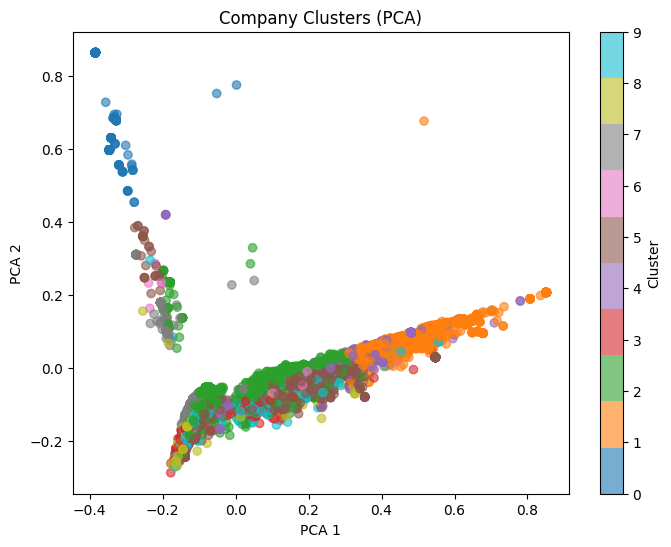

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_matrix_imputed)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Company Clusters (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()